# An Analysis of Climate Change and Global Warming Since 1750

## 1. Background
<br>Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. The global climate change has already had observable effects on the environment. Glaciers have shrunk, ice on rivers and lakes is breaking up earlier, plant and animal ranges have shifted and trees are flowering sooner. Effects that scientists had predicted in the past would result from global climate change are now occurring: loss of sea ice, accelerated sea level rise and longer, more intense heat waves.<br />
<br>Global climate is projected to continue to change over this century and beyond, and the temperatures will continue to change in future.<br />
<br>An analysis of global climate and temperature data will provide us a good understanding of how the climate will change and how critical the effect of global warming. Also, there might be hidden patterns, trends, or relationships between temperature and climate change to be revealed.<br />

## 2. Protential clients
<br>There are two different types of potential clients that could be interested in the finding from this project. The first type of clients would be the government. The government may have to concern about the inflence comes with the climate change. We all know that environment change induced by human activities will affect climate greatly. In this way, the government have to take necessary actions to reduce this effect before it is too late. For example, the government could limit the waste gas emission of a factory every day to reduce the damage to the atmosphere. The scond type of clients would be the environmental and climate protection organizationm, which may pay attention to appeal for protecting environment.<br/>

## 3. Datasets used, Exploration and Wrangling
<br>The dataset is coming from one of the Kaggle competition, "Climate Change: Earth Surface Temperature Data", which consists of 5 sub-datasets. They are organized into 4 different categories, which are cities, major cities, states, and countries. In this project, I used 4 sub-datasets from this dataset. <br/>

### 3.1 Initial data exploration
<br> Each dataset was provided as a CSV file, so that I can improt them into IPython directly as Pandas data frames.<br/>
<br> I checked the first five rows of each dataset. The Global Temperatures one (GlobalTemperatures.csv) consists of average global temperatures from 1750 to 2015. The other four datasets records temperatures in different catergories. And in addition to temperature data, they also records geographic information respectively. <br/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [8]:
global_temp = pd.read_csv('GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.5+ KB


In [5]:
MCity_temp = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
MCity_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [6]:
MCity_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
dt                               239177 non-null object
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


### 3.2 Checking for missing values
<br> I also checked to see if there were any missing values in these dataframes. I noticed that there are many missing values in the beginning of the dataframe. We could expect that the data missing are caused by lost in transmission. Fortunately, the missing values are a relatively small fraction of the whole dataset, and we don't interested in the data far before, so I could dropped the rows with missing values in the dataframes without affecting the final result too much. <br/>

In [9]:
global_temp_dt = global_temp[['dt','LandAverageTemperature','LandAverageTemperatureUncertainty']]
global_temp_dt = global_temp_dt[global_temp_dt.LandAverageTemperature.notnull()]
global_temp_dt = global_temp_dt.reset_index(drop=True)
global_temp_dt.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


In [14]:
Country_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
Country_temp = Country_temp[Country_temp.AverageTemperature.notnull()]
Country_temp.reset_index(drop=True).head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland
3,1744-06-01,11.609,1.577,Åland
4,1744-07-01,15.342,1.410,Åland


### 3.3 Data wrangling
<br> In this project, some data is not necessary for analysis, such as "Uncertainty", and I dropped the whole column if I found it not really helpful. Also, there are geographic informations in datasets. These infomations are presented as string type, so I have to convert them all into float type. Also, the index of the dataset have to reset as location name, or date-time index if necessary.<br/>

In [10]:
def convert(tude):
    multi = 1 if tude[-1] in ['N','E'] else -1
    return multi * float(tude[:-1])

In [11]:
MCity_dt = MCity_temp.groupby(['City'])
MCity_mean = MCity_dt.AverageTemperature.mean()
MCity_Lat = MCity_dt.Latitude.first()
MCity_new_dt = pd.DataFrame(MCity_mean)
MCity_new_dt['Latitude'] = pd.Series(MCity_Lat,index = MCity_new_dt.index)
for i, num in enumerate(MCity_new_dt['Latitude']):
     MCity_new_dt.ix[i,'Latitude'] = convert(num)
MCity_new_dt.head()

,AverageTemperature,Latitude
City,,
Abidjan,26.163737,5.63
Addis Abeba,17.525073,8.84
Ahmadabad,26.529853,23.31
Aleppo,17.370587,36.17
Alexandria,20.312617,31.35


In [12]:
City_temp = pd.read_csv('GlobalLandTemperaturesByCity.csv')
City_temp = City_temp[City_temp.AverageTemperature.notnull()]
City_temp = City_temp.reset_index(drop=True)
City_dt = City_temp.groupby(['City'])
City_mean = City_dt.AverageTemperature.mean()
City_Lat = City_dt.Latitude.first()
City_new_dt = pd.DataFrame(City_mean)
City_new_dt['Latitude'] = pd.Series(City_Lat,index = City_new_dt.index)
City_new_dt = City_new_dt[City_new_dt.Latitude.notnull()]
for i, num in enumerate(City_new_dt['Latitude']):
     City_new_dt.ix[i,'Latitude'] = convert(num)
City_new_dt.head()

,AverageTemperature,Latitude
City,,
A Coruña,13.147277,42.59
Aachen,8.825173,50.63
Aalborg,7.695135,57.05
Aba,26.612824,5.63
Abadan,25.034749,29.74


## 4. Further exploration and Statstic result
<br>In this section, I will perform further explorations on some topics worth studying of the datasets. After that, statstic results and graphs can be provided as a reference for further study and research.<br/>

### 4.1 Is the global temperature increasing or not?
<br> The global warming effect is the observed century-scale rise in the average temperature of the Earth's climate system and its related effects, which is considered as the most critical environmental problem. The warming evident in the instrumental temperature record is consistent with a wide range of observations, including sea level rise, and widespread melting of snow and land ice. The result received from this analysis will help discovering the future risk of global warming.<br/>
<br>To figure out this problem, I will do analysis on the Global Temperatures dataset (GlobalTemperatures.csv).<br/>

In [15]:
global_temp_dt['LandUncerMax'] = pd.Series(global_temp_dt.LandAverageTemperature+global_temp_dt.LandAverageTemperatureUncertainty, index=global_temp_dt.index)
global_temp_dt['LandUncerMin'] = pd.Series(global_temp_dt.LandAverageTemperature-global_temp_dt.LandAverageTemperatureUncertainty, index=global_temp_dt.index)
global_temp_dt = global_temp_dt.drop('LandAverageTemperatureUncertainty', 1)
global_temp_dt.head()

,dt,LandAverageTemperature,LandUncerMax,LandUncerMin
0,1750-01-01,3.034,6.608,-0.540
1,1750-02-01,3.083,6.785,-0.619
2,1750-03-01,5.626,8.702,2.550
3,1750-04-01,8.490,10.941,6.039
4,1750-05-01,11.573,13.645,9.501


* First, I will plot the temperature graph from 1750. The orignial dataset is recorded in a month frequency, so I have to resample them all into a year frequence and take mean for each year.
* I also used the uncertainty values to find the confident level of these records. From the plot, we could see the gap between upper bound and lower bound of uncertainty is quite large from the beginning, and the trend of the gap is decreasing as the time goes on. This is a logical result, because the uncertainty becomes large with the outdated facilities, and the modern one would be better to predict a precise temperature.
* But the graph is jaggy and hard to tell the trend of temperature is increasing or not.

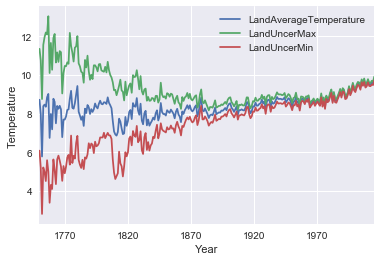

In [16]:
global_temp_dt = global_temp_dt.set_index(['dt'])
global_temp_dt.index = pd.to_datetime(global_temp_dt.index)
global_temp_dt_year = global_temp_dt.resample("A").mean()
ax = global_temp_dt_year.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Temperature")

* To remove jaggy, I used a rolling window with size of 20 and take mean of every window. And we could see the plot is oscillatory, especially during the time with large uncertainty. And in this way, we could notice that the trend of temperature seems increase in the later part of the plot.

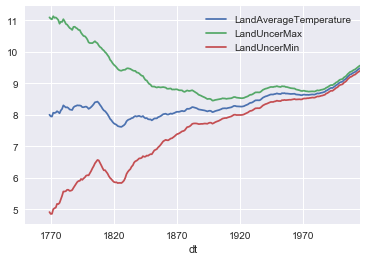

In [17]:
roll_dt = global_temp_dt_year.rolling(window=20).mean()
roll_dt.plot()

* I also plot the difference of temperatures for each year, with respect to the temperature of 1750. We could notice that before 1970, the global average temperature was lower than the temperature in 1750 in general. But after 1970, there is a clear upward trend.

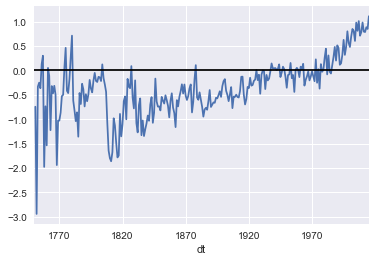

In [18]:
global_temp_dt_decade = global_temp_dt.resample("A").mean()
global_temp_dt_decade['diff'] = global_temp_dt_decade.LandAverageTemperature.diff(1)
global_temp_dt_decade['diff'].cumsum().plot()
plt.axhline(0, color='k')

* One way to clarify the trend is using linear regression. On the plot, we could notice that it is a clearly upward curve, after time around 1850. We could also notice that the variance is large at the early part. But as the time shift, the variance becomes smaller. That means the curve represents the values more precisely at the later part of the plot, and it is more uncommon to have an outlier far away from this curve. So that this curve could be used to predict the future temperatures.

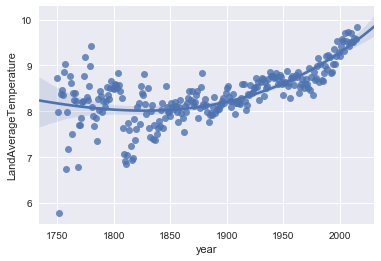

In [19]:
g = global_temp[['dt','LandAverageTemperature','LandAverageTemperatureUncertainty']]
g = g[g.LandAverageTemperature.notnull()]
g = g.reset_index(drop=True)
g = g.drop('LandAverageTemperatureUncertainty', 1)
g = g.set_index(['dt'])
g.index = pd.to_datetime(g.index)
g_year = g.resample("A").mean()
g_year['year'] = pd.Series(list(range(1750,2016)),index = g_year.index)
sns.regplot(y="LandAverageTemperature", x='year', data=g_year, order = 3, fit_reg=True)

* I used a polynomial linear regression model to fit the data, and from the plot, we could see the prediction from the model revealed that the global temperature will keep rising in the future. At this point, we could make a conclusion that, the global temperature is increasing.

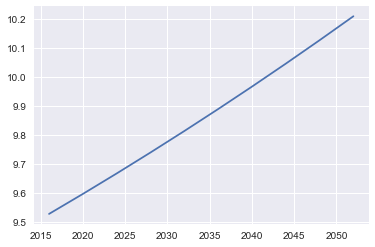

In [65]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(g_year[['year']], g_year.LandAverageTemperature)

year_pred = pd.DataFrame(pd.Series(list(range(2016,2056,4))))
temp_pred = model.predict(year_pred)
plt.plot(list(range(2016,2056,4)),temp_pred)

### 4.2 How are latitude and longitude related to general climate and temperature patterns?
<br>It has long been assumed that climate is largely controlled by location or geography. The specific location of any particular place on the planet's surface can be determined using geographic coordinates. The two numbers that are used to indicate a global address, as well as the different time zones, are called latitude and longitude. In this part, I will figure out how the temperature relate to the location.<br/>
<br>For this problem, I used the The Global Land Temperatures By City dataset, which already includes the Major City one. I calculated the mean of every countries thru the whole time period, and they end up with a single temperture value with the converted location informaitons.<br/>

In [68]:
City_temp = pd.read_csv('GlobalLandTemperaturesByCity.csv')
City_temp = City_temp[City_temp.AverageTemperature.notnull()]
City_temp = City_temp.reset_index(drop=True)
City_dt = City_temp.groupby(['City'])
City_mean = City_dt.AverageTemperature.mean()
City_Lat = City_dt.Latitude.first()
City_Long = City_dt.Longitude.first()
City_new_dt = pd.DataFrame(City_mean)
City_new_dt['Latitude'] = pd.Series(City_Lat,index = City_new_dt.index)
City_new_dt['Longitude'] = pd.Series(City_Long,index = City_new_dt.index)
City_new_dt = City_new_dt[City_new_dt.Latitude.notnull()]
for i, num in enumerate(City_new_dt['Latitude']):
     City_new_dt.ix[i,'Latitude'] = convert(num)
for i, num in enumerate(City_new_dt['Longitude']):
     City_new_dt.ix[i,'Longitude'] = convert(num)
City_new_dt.head()

,AverageTemperature,Latitude,Longitude
City,,,
A Coruña,13.147277,42.59,-8.73
Aachen,8.825173,50.63,6.34
Aalborg,7.695135,57.05,10.33
Aba,26.612824,5.63,8.07
Abadan,25.034749,29.74,48


* Below are the plots of temperature versus Latitude and Longitude. From the plot, we could observe that there is some kind of distribution in the latitude plot, but a random distribution in the longitude plot. So I will do a further reserach in the latitude.

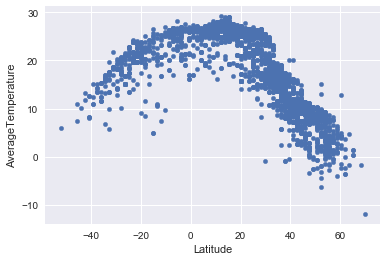

In [69]:
City_new_dt.plot.scatter(x='Latitude', y='AverageTemperature')

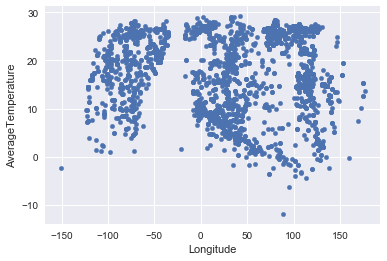

In [70]:
City_new_dt.plot.scatter(x='Longitude', y='AverageTemperature')

* I used the linear regression to fit model, and I received a bell curve. That is a reasonable result, since the areas closest to the equator, called the tropics, receive the highest amount of sunlight and are generally warmer compared to other parts of the planet. The places located at mid-latitudes, known as the temperate regions, experience both the tropical heat and the arctic cold. Regions at very high latitudes receive the least amount of sunlight, which results in very cold temperatures.

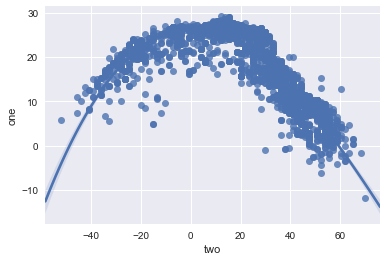

In [71]:
L = []
T = []
for i in City_new_dt.Latitude:
    L.append(i)
for i in City_new_dt.AverageTemperature:
    T.append(i)
L_Ser = pd.Series(L)
T_Ser = pd.Series(T)
LT = pd.DataFrame({'one':T_Ser,'two':L_Ser})
sns.regplot(y="one", x="two", data=LT, order = 3, fit_reg=True)

### 4.3 What are the hottest and the coldest country?
<br>When you are talking about the perfect weather conditions, there are multiple factors involved in making the weather perfect. Some people like the warm weather conditions, some have the habit to enjoy the cold. One may interested in which country is the hottest country and which is the coldest country. In this section, I will list the top 10 hottest and the coldest countries in the world.<br/>
<br>For this problem, I used the The Global Land Temperatures By Country dataset.<br/>

In [72]:
Country_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
Country_temp = Country_temp[Country_temp.AverageTemperature.notnull()]
Country_temp.reset_index(drop=True).head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland
3,1744-06-01,11.609,1.577,Åland
4,1744-07-01,15.342,1.410,Åland


* I took average of every countries and sort the whole dataframe by values. Then I picked the first 10 and the last 10 countries and plotted a bar chart. 
* The hottest countries have similar temperatures, while the temperatures of coldest countries are not really close. I would consider that it shares the similar distribution of the plot we saw in 4.2, where most countries with high average temperature concentrate around equator, and there are few countries locate at the region with lower average temperatures, where near polar region in general.

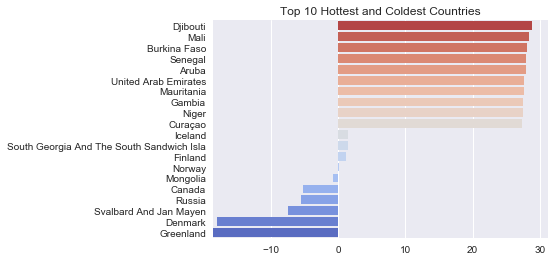

In [73]:
Country_dt = Country_temp.groupby('Country').AverageTemperature.mean()
Country_dt = Country_dt.sort_values(ascending = False)
Country_dt = Country_dt.ix[np.r_[:10,Country_dt.shape[0]-10:Country_dt.shape[0]]]
Country_list = Country_dt.index.tolist()
CountryTemp_list = Country_dt.tolist()
colors = sns.color_palette('coolwarm', 20)
sns.barplot(CountryTemp_list,Country_list,palette = colors[::-1])
sns.plt.title('Top 10 Hottest and Coldest Countries')

## 5. Climate Classification using Machine Learning
<br>Ideally, I would have liked to have characteristics of all types of climate along with the corresponding temperatures. This would have allowed me to perform prediction of climate type for a new location, and more study on these climate types as well. In this part, I will use the country base dataset<br/>

### 5.1 Feature Selection
<br>When selecting feature values for further process for this problem, I was first thinking about using the average temperatures in years for every country, and I could use these feature values to do classification on them. But this is not reasonable selection, because <br/>
   * There are over 300 (years) feature values, but there are only 242 countries, which means only 242 sets of data  to be trained, which may results in underfitting of the model.
   * The annual average temperatures of any type of climate depends more on the global climate change, which means all of them share the similar trend of variation in temperature.
   
<br>An alternative way to select feature values is using the monthly temperature. This is a more feasible way, because <br/>
   * Only 12 (months) feature values, which is possible to be trained using 242 sets of data.
   * Monthly temperature is more representative to a climate type. Different climate types may share the same annual average temperature, but different in monthly temperature.

### 5.2 Model Selection
<br>The datasets does not provide us the climate type of each countries, so I don't have the label recorded in dataset to train, which results in an unsupervised clustering learning problem. In general, we have several basic clustering models to solve this problem.<br/>
<br>Before training, I have to obtain the feature values for each country. I used a pivot table with country as row element and monthly temperature as column element. And I used mean function as aggregate function, so that the values I obtained are the mean values thru 1750 to 2015 in month.<br/>
<br>In general, K-Means clustering is a commonly use method. Another method I tried is hierarchical clustering, which depends on the Euclidean distance (or some other metrics) between two points, and the closest points will be merged into one cluster. Strategies for hierarchical clustering generally fall into two types, Agglomerative and Divisive. And in the general case, the complexity of agglomerative clustering is  ${\mathcal {O}}(n^{2}\log(n))$,  which makes them too slow for large data sets. Divisive clustering with an exhaustive search is ${\mathcal {O}}(2^{n})$, which is even worse. So I will try to implement the agglomerative clustering for this case.

In [76]:
Country_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
Country_temp = Country_temp[Country_temp.AverageTemperature.notnull()]
Country_temp.reset_index(drop=True).head()
Country_temp = Country_temp.drop('AverageTemperatureUncertainty',1)
Country_temp['dt'] = pd.to_datetime(Country_temp.dt)
m = Country_temp.dt
Country_m = []
for i in m:
    Country_m.append(i.month)
Country_temp_month = Country_temp.assign(Month = Country_m)
table = pd.pivot_table(Country_temp_month,index='Country',columns = 'Month',values = 'AverageTemperature')
table.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Afghanistan,0.469763,2.916785,8.416103,14.499520,20.288477,24.933201,26.932966,25.220417,20.318960,13.864779,7.718598,2.545520
Africa,20.942925,22.237892,23.901484,25.005126,25.645503,25.516013,25.211234,25.364570,25.677854,24.970178,23.182083,21.196174
Albania,2.860728,4.284409,7.354585,11.295094,16.038395,19.978852,22.440231,22.134456,18.409932,13.508053,8.635586,4.482817
Algeria,11.820880,14.428823,18.377369,22.498071,27.148478,31.475217,33.662695,32.918013,29.470013,23.772215,17.542138,12.611409
American Samoa,26.789485,26.934397,27.066556,26.951059,26.880854,26.544625,26.211162,26.187563,26.259409,26.278772,26.562711,26.680459


#### 5.2.1 K-Means Clustering

In [77]:
from sklearn.cluster import KMeans

x_cols = table.values
kmeans = KMeans(n_clusters=5, random_state=0).fit(x_cols)
cluster_labels = kmeans.predict(x_cols)
d = {'Country':table.index,'cluster_id': cluster_labels}
Country_df = pd.DataFrame(data=d)
Country_df.set_index('Country').head(10)

,cluster_id
Country,
Afghanistan,0
Africa,1
Albania,4
Algeria,0
American Samoa,1
Andorra,4
Angola,3
Anguilla,1
Antigua And Barbuda,1


In [84]:
data = [dict(
        type = 'choropleth',
        locations = Country_df['Country'],
        z = Country_df['cluster_id'],
        locationmode = 'country names',
        text = Country_df['Country'],
        marker = dict(
            line = dict(
                color = 'rgb(0,0,0)', width = 0.5)), 
        colorbar = dict(
            autotick = False,
            ypad = 5,
            title = 'Climate Type'))]

layout = dict(
    title = 'Climate types of Countries',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

#### 5.2.2 Hierarchical Clustering

In [82]:
from sklearn.cluster import AgglomerativeClustering

x_cols = table.values
HCluster = AgglomerativeClustering(n_clusters=5).fit(x_cols)
cluster_labels_2 = HCluster.fit_predict(x_cols)
d = {'Country':table.index,'cluster_id': cluster_labels_2}
Country_df_2 = pd.DataFrame(data=d)
Country_df_2.set_index('Country').head(10)

,cluster_id
Country,
Afghanistan,0
Africa,4
Albania,0
Algeria,1
American Samoa,4
Andorra,0
Angola,3
Anguilla,4
Antigua And Barbuda,4


In [83]:
data = [dict(
        type = 'choropleth',
        locations = Country_df_2['Country'],
        z = Country_df_2['cluster_id'],
        locationmode = 'country names',
        text = Country_df_2['Country'],
        marker = dict(
            line = dict(
                color = 'rgb(0,0,0)', width = 0.5)), 
        colorbar = dict(
            autotick = False,
            ypad = 5,
            title = 'Climate Type'))]

layout = dict(
    title = 'Climate types of Countries',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### 5.3 Result and Conclusion
<br>I used 5 clusters for both cases, which is according to there are 5 climate zones and I assumed that latitude is one of the main reasons makes different climate types. <br/>
<br>The results obtained from two models are the same (except for different colors shown on the plot). In my view, the reasons for this result is all clusters are relatively isolated, and most clustering could get the similar clusters. <br/>
<br>Under such condition, we could observe that the climate types are mostly seperated based on the latitudes, which proved my hypothesis. I may also try to train into more clusters (or more sub-types of climate), but I would consider that is not reasonable, because there will be many sub-types of climate even for a small country, and it is hard to say which one will be representative.<br/>